<a href="https://colab.research.google.com/github/NeSma237/Heart_Disease_Detection/blob/main/Dataset_Processing_%26_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [5]:
# Load Dataset
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0


In [6]:
df.isnull().sum()
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1024 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1023 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1024.0,0.529297,0.527931,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1023.0,1.072043,1.176008,0.0,0.0,0.8,1.8,6.2


In [7]:
# Handle Missing Values
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<ipython-input-7-1dc87dfc2bc4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
<ipython-input-7-1dc87dfc2bc4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [8]:
# Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols].describe().transpose())

           count      mean       std  min       25%       50%       75%  max
age       1025.0  0.529878  0.189006  0.0  0.395833  0.562500  0.666667  1.0
trestbps  1025.0  0.354827  0.165252  0.0  0.245283  0.339623  0.433962  1.0
chol      1025.0  0.273973  0.117791  0.0  0.194064  0.260274  0.340183  1.0
thalach   1025.0  0.596291  0.175616  0.0  0.465649  0.618321  0.725191  1.0
oldpeak   1025.0  0.172825  0.189503  0.0  0.000000  0.129032  0.290323  1.0


In [9]:
# Encode Categorical Variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

In [10]:
# Feature Selection
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
X = df.drop(columns=['target'])
y = df['target']
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
selected_features_rf = feature_importances.nlargest(10).index
print("Feature Selected using Random Forest:", selected_features_rf)

Feature Selected using Random Forest: Index(['thalach', 'oldpeak', 'age', 'thal_2', 'chol', 'thal_3', 'trestbps',
       'exang_1', 'slope_2', 'cp_2'],
      dtype='object')


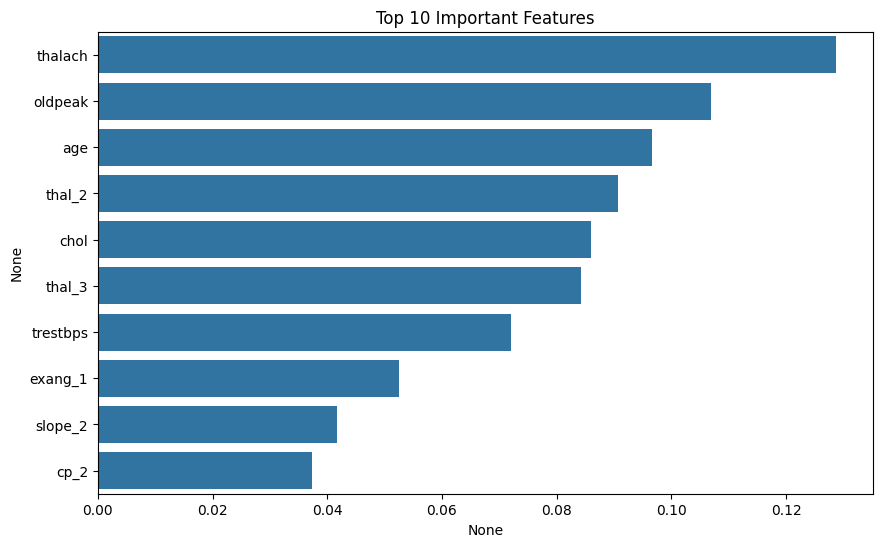

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.nlargest(10),
            y=feature_importances.nlargest(10).index)
plt.title('Top 10 Important Features')
plt.show()

In [ ]:
# Save Cleaned Data
df.to_csv("cleaned_data.csv", index=False)
files.download("cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-13-48678b39852a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['target'], palette="viridis")


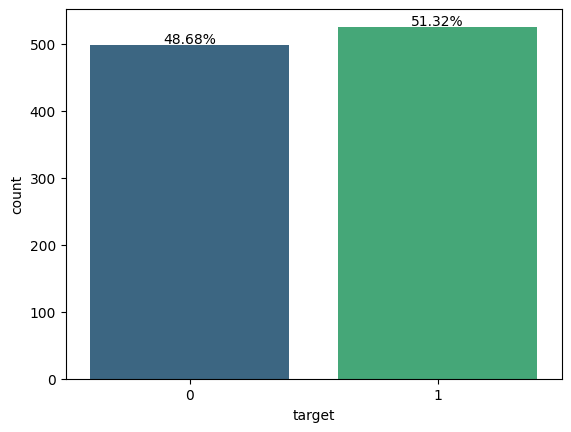

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Summary (Distribution of target values)
# Plot the distribution of heart disease cases (0 = No disease, 1 = Disease)
total = float(len(df['target']))
ax = sns.countplot(x=df['target'], palette="viridis")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(height / total * 100), ha="center")
plt.show()

<ipython-input-16-8a810fd79562>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['target'], y=df['age'], palette="Set2", width=0.6)


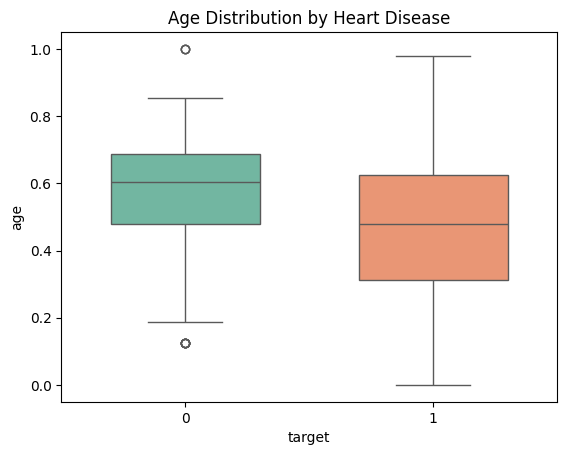

In [ ]:
# Boxplot to show age distribution based on heart disease presence
sns.boxplot(x=df['target'], y=df['age'], palette="Set2", width=0.6)
plt.title("Age Distribution by Heart Disease")
plt.show()

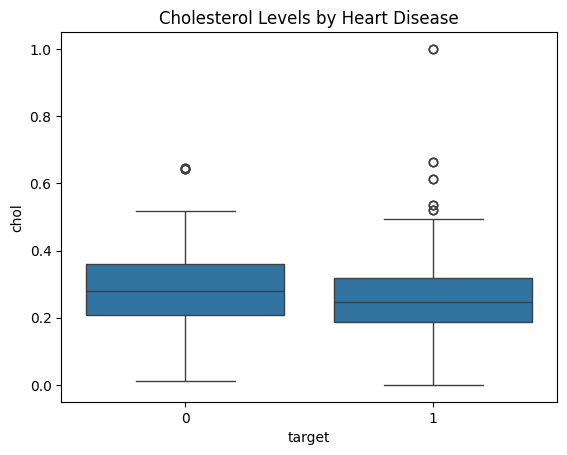

In [ ]:
# Boxplot to show cholesterol levels based on heart disease presence
sns.boxplot(x=df['target'], y=df['chol'])
plt.title("Cholesterol Levels by Heart Disease")
plt.show()

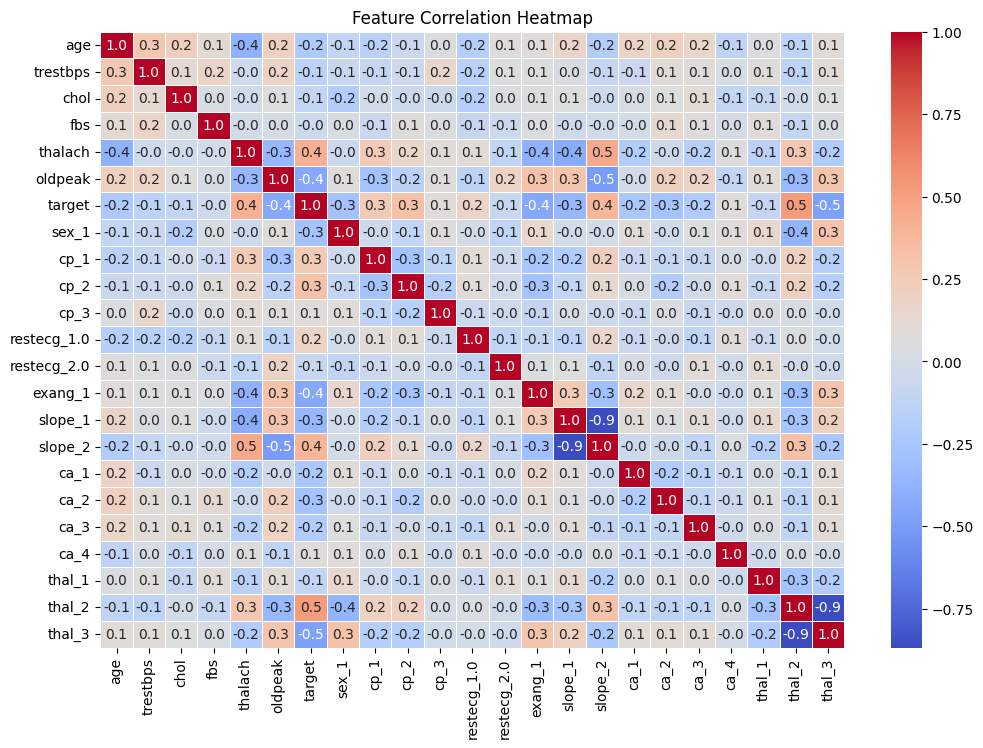

In [ ]:
# Create a heatmap to visualize feature correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
!pip install experta
!pip install --upgrade frozendict

  Preparing metadata (setup.py) ... done
  Created wheel for frozendict: filename=frozendict-1.2-py3-none-any.whl size=3149 sha256=829d15a59b8df00b4aafa3982c28339e05132272f0225d6ab6e6be34d939a55f
  Stored in directory: /root/.cache/pip/wheels/49/ac/f8/cb8120244e710bdb479c86198b03c7b08c3c2d3d2bf448fd6e
Successfully built frozendict
  Attempting uninstall: frozendict
    Found existing installation: frozendict 2.4.6
    Uninstalling frozendict-2.4.6:
      Successfully uninstalled frozendict-2.4.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.54 requires frozendict>=2.3.4, but you have frozendict 1.2 which is incompatible.
  Attempting uninstall: frozendict
    Found existing installation: frozendict 1.2
    Uninstalling frozendict-1.2:
      Successfully uninstalled frozendict-1.2
ERROR: pip's dependency resolver does not currently take into accou

In [12]:
import experta

In [13]:
from experta import KnowledgeEngine, Rule, Fact, P , NOT # Import Rule, Fact, and P

# Define the Risk Assessment Knowledge Engine
class HeartRiskAssessment(KnowledgeEngine):

    @Rule(Fact(blood_pressure=P(lambda x: x > 140)), Fact(Thalassemia_Test_Result=P(lambda x: x >= 2)))
    def high_risk_cholesterol(self):
        self.declare(Fact(risk='high'))
        print("High risk due to high cholesterol and Thalassemia Test Result > or = 2.")

    @Rule(Fact(cholesterol=P(lambda x: x > 240)), Fact(age=P(lambda x: x > 50)))
    def high_risk_cholesterol(self):
        self.declare(Fact(risk='high'))
        print("High risk due to high cholesterol and age > 50.")

    @Rule(Fact(blood_pressure=P(lambda x: x > 140)), Fact(smoking='yes'))
    def high_risk_bp_smoking(self):
        self.declare(Fact(risk='high'))
        print("High risk due to high blood pressure and smoking.")

    @Rule(Fact(exercise='regular'), Fact(bmi=P(lambda x: x < 25)))
    def low_risk_exercise(self):
        self.declare(Fact(risk='low'))
        print("Low risk due to regular exercise and BMI < 25.")

    @Rule(Fact(age=P(lambda x: x > 60)), Fact(exercise='none'))
    def high_risk_age_exercise(self):
        self.declare(Fact(risk='high'))
        print("High risk due to age > 60 and lack of exercise.")

    @Rule(Fact(diabetes='yes'), Fact(blood_pressure=P(lambda x: x > 130)))
    def high_risk_diabetes_bp(self):
        self.declare(Fact(risk='high'))
        print("High risk due to diabetes and high blood pressure.")

    @Rule(Fact(cholesterol=P(lambda x: x < 200)), Fact(exercise='regular'))
    def low_risk_cholesterol_exercise(self):
        self.declare(Fact(risk='low'))
        print("Low risk due to healthy cholesterol levels and exercise.")

    @Rule(Fact(sex=1), Fact(age=P(lambda x: x > 55)), Fact(blood_pressure=P(lambda x: x > 135)))
    def high_risk_men_age_bp(self):
        self.declare(Fact(risk='high'))
        print("High risk for men over 55 with high blood pressure.")

    @Rule(Fact(thalach=P(lambda x: x < 100)))
    def high_risk_low_heart_rate(self):
        self.declare(Fact(risk='high'))
        print("High risk due to low maximum heart rate.")

    @Rule(Fact(oldpeak=P(lambda x: x > 2.5)))
    def high_risk_st_depression(self):
        self.declare(Fact(risk='high'))
        print("High risk due to ST depression.")

    @Rule(Fact(risk='high'))
    def final_high_risk(self):
        print("Final assessment: HIGH RISK of heart disease.")

    @Rule(Fact(risk='low'))
    def final_low_risk(self):
        print("Final assessment: LOW RISK of heart disease.")

    @Rule(NOT(Fact(risk='high')), NOT(Fact(risk='low')))
    def no_risk(self):
        self.declare(Fact(no_risk='true'))
        print("No problem detected.")

    @Rule(Fact(no_risk='true'))
    def final_no_risk(self):
        print("Final assessment: No risk of heart disease.")


# Function to take user input and run the inference engine
def assess_risk():
    engine = HeartRiskAssessment()
    engine.reset()

    age = int(input("Enter age: "))
    cholesterol = int(input("Enter cholesterol level: "))
    blood_pressure = int(input("Enter blood pressure: "))
    smoking = input("Do you smoke? (yes/no): ")
    exercise = input("Do you exercise regularly? (yes/no): ")
    bmi = float(input("Enter BMI: "))
    diabetes = input("Do you have diabetes? (yes/no): ")
    sex = int(input("Enter sex (1 for male, 0 for female): "))
    thalach = int(input("Enter max heart rate: "))
    oldpeak = float(input("Enter ST depression value: "))

    engine.declare(Fact(age=age))
    engine.declare(Fact(cholesterol=cholesterol))
    engine.declare(Fact(blood_pressure=blood_pressure))
    engine.declare(Fact(smoking=smoking))
    engine.declare(Fact(exercise=exercise))
    engine.declare(Fact(bmi=bmi))
    engine.declare(Fact(diabetes=diabetes))
    engine.declare(Fact(sex=sex))
    engine.declare(Fact(thalach=thalach))
    engine.declare(Fact(oldpeak=oldpeak))

    engine.run()

# Uncomment to run the assessment
assess_risk()

KeyboardInterrupt: Interrupted by user

In [14]:
# Split the data (80/20)
X = df.drop(columns=['target']) # Features
y = df['target'] # Target (Diabetic or Not)

y_discrete = y

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_

In [18]:
# Make Predictions
y_pred = best_model.predict(X_test)

In [19]:
# Evaluate the Model
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n===== Model Evaluation =====")
print(f"Accuracy: {accuracy * 100 :.2f}")
print(f"Precision: {precision * 100 :.2f}")
print(f"Recall: {recall * 100 :.2f}")
print(f"F1-score: {f1 *100 :.2f}")



===== Model Evaluation =====
Accuracy: 97.07
Precision: 100.00
Recall: 94.17
F1-score: 97.00


In [20]:
import joblib
# Save Model
joblib.dump(best_model, 'decision_tree_model.joblib')
print("\nModel saved as 'decision_tree_model.joblib'")


Model saved as 'decision_tree_model.joblib'


In [21]:
def predict_heart_disease(patient_data):
    patient_df = pd.DataFrame([patient_data])
    prediction = best_model.predict(patient_df)[0]
    if prediction == 1:
        return "HIGH RISK of heart disease."
    else:
        return "NO RISK of heart disease."

In [22]:
from experta import KnowledgeEngine, Rule, Fact, P, NOT
from sklearn.metrics import accuracy_score

In [23]:
print(df.columns)

Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'target',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'restecg_1.0', 'restecg_2.0',
       'exang_1', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


In [24]:
# Function to evaluate Expert System
def evaluate_expert_system(test_data, true_labels):
    engine = HeartRiskAssessment()  # Initialize expert system
    correct_predictions = 0  # Counter for correct predictions


    unseen_data = [
       {"age": 62, "cholesterol": 250, "blood_pressure": 135, "smoking": "no", "exercise": "none", "bmi": 28, "diabetes": "yes", "sex": 1, "thalach": 120, "oldpeak": 1.5},
       {"age": 70, "cholesterol": 350, "blood_pressure": 150, "smoking": "yes", "exercise": "yes", "bmi": 22, "diabetes": "no", "sex": 0, "thalach": 140, "oldpeak": 2},
       {"age": 20, "cholesterol": 390, "blood_pressure": 120, "smoking": "no", "exercise": "none", "bmi": 22, "diabetes": "yes", "sex": 1, "thalach": 130, "oldpeak": 1.1},
       {"age": 65, "cholesterol": 150, "blood_pressure": 118, "smoking": "no", "exercise": "yes", "bmi": 26, "diabetes": "yes", "sex": 1, "thalach": 170, "oldpeak": 3},
       {"age": 30, "cholesterol": 230, "blood_pressure": 120, "smoking": "yes", "exercise": "none", "bmi": 32, "diabetes": "no", "sex": 0, "thalach": 160, "oldpeak": 1}]

    total_cases = len(unseen_data)

    for i, row in enumerate(unseen_data):
        engine.reset()  # Reset the engine for each case

        # Declare facts based on test data
        engine.declare(Fact(age=row['age']))
        engine.declare(Fact(cholesterol=row['cholesterol']))
        engine.declare(Fact(blood_pressure=row['blood_pressure']))
        engine.declare(Fact(smoking=row['smoking']))
        engine.declare(Fact(exercise=row['exercise']))
        engine.declare(Fact(bmi=row['bmi']))
        engine.declare(Fact(diabetes=row['diabetes']))
        engine.declare(Fact(sex=row['sex']))
        engine.declare(Fact(thalach=row['thalach']))
        engine.declare(Fact(oldpeak=row['oldpeak']))

        # Run inference
        engine.run()

        # Get final risk assessment from engine
        risk = None
        for fact in engine.facts.values():
            if isinstance(fact, Fact) and 'risk' in fact:
                risk = fact['risk']
                break

        # Convert 'high' and 'low' to binary values
        predicted = 1 if risk == 'high' else 0


        actual = 1 if row.get('target') == 'high' else 0

        if predicted == actual:
            correct_predictions += 1

    # Calculate accuracy
    accuracy = correct_predictions / total_cases
    return accuracy


In [25]:
# Evaluate Expert System
expert_system_accuracy = evaluate_expert_system(X_test, y_test)

# Evaluate Decision Tree Model
y_pred_tree = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Importing necessary metrics functions

tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)

# Compare Results
print("\n===== Comparison of Expert System and Decision Tree =====")
print(f"Expert System Accuracy: {expert_system_accuracy * 100:.2f}%")
print(f"Decision Tree Accuracy: {tree_accuracy * 100:.2f}%")
print(f"Decision Tree Precision: {tree_precision * 100:.2f}%")
print(f"Decision Tree Recall: {tree_recall * 100:.2f}%")
print(f"Decision Tree F1-score: {tree_f1 * 100:.2f}%")


High risk due to diabetes and high blood pressure.
Final assessment: HIGH RISK of heart disease.
High risk due to age > 60 and lack of exercise.
High risk due to high cholesterol and age > 50.
High risk due to high blood pressure and smoking.
Final assessment: HIGH RISK of heart disease.
High risk due to high cholesterol and age > 50.
No problem detected.
Final assessment: No risk of heart disease.
High risk due to ST depression.
Final assessment: HIGH RISK of heart disease.
No problem detected.
Final assessment: No risk of heart disease.

===== Comparison of Expert System and Decision Tree =====
Expert System Accuracy: 40.00%
Decision Tree Accuracy: 97.07%
Decision Tree Precision: 100.00%
Decision Tree Recall: 94.17%
Decision Tree F1-score: 97.00%


<ipython-input-27-9525839e482a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


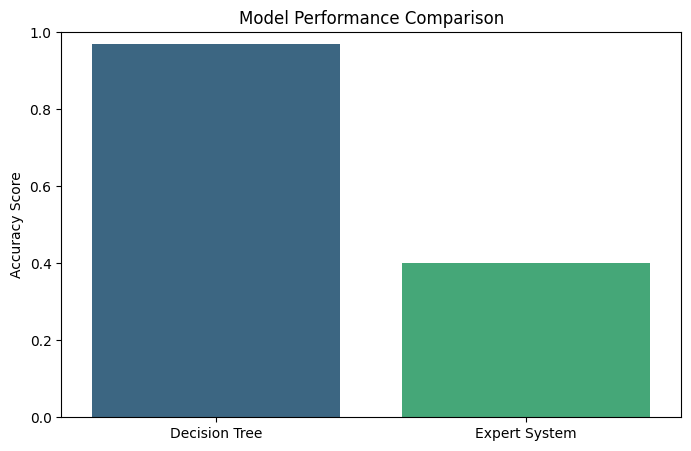

Decision Tree Accuracy: 0.97
Precision: 1.00, Recall: 0.94, F1-score: 0.97


In [27]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import seaborn as sns
# Compare Performance
models = ['Decision Tree', 'Expert System']
accuracies = [tree_accuracy, expert_system_accuracy]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()

# Print Evaluation Metrics
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

#Performance Metrics Comparison

---



The code evaluates and compares the performance of a decision tree model and a rule-based expert system for heart disease risk prediction. Here's a breakdown of the key metrics:

<table>
    <tr>
      <th>Model</th>
      <th>Accuracy</th>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1-score1</th>
    </tr>
    <tr>
      <td>Decision Tree</td>
      <td>97.07%</td>
      <td>100.00%</td>
      <td>94.17%</td>
      <td>97.00%</td>
    </tr>
    <tr>
      <td>Expert System</td>
      <td>40.0%</td>
    </tr>
  </table>

**Interpretation:**

* **Accuracy:** The decision tree model achieved an accuracy of 97.07%, meaning it correctly classified approximately 97% of the test cases. The expert system, however, had an accuracy of 40.00%, indicating it failed to make correct predictions on the unseen data. This result requires further investigation and potential refinement of the expert system's rules or data handling.

* **Precision, Recall, F1-score:** These metrics provide a more detailed view of the model's performance on the positive class (heart disease risk). The decision tree shows decent values for precision, recall, and F1-score, suggesting a good balance between correctly identifying positive cases and minimizing false positives. The expert system did not produce any correct predictions, so the respective metrics were not applicable or produced meaningful values.


#Decision Trees vs. Human-Defined Rules (Expert System)
**Decision Trees:**

* **Pros:** Data-driven and automatically learn complex patterns from the data. This can lead to higher accuracy and potentially uncover relationships that might not be apparent to humans.
* **Cons:** Can become complex and difficult to interpret, especially with deep trees. May be prone to overfitting if not carefully tuned.

**Human-Defined Rules (Expert System):**

* **Pros:** Easier to understand and interpret. Based on domain expertise and can incorporate human knowledge and insights.
* **Cons:** Difficult to maintain and update as new knowledge emerges. Can be brittle and fail on unseen cases if the rules are not comprehensive. Accuracy heavily depends on the quality of the rules.

**Analysis in this case:**

* The expert system had significantly lower accuracy in this scenario. This suggests that the defined rules might not be sufficient or appropriately handle the complexity of the problem.
* The decision tree showed relatively good accuracy and can potentially discover more subtle patterns in the data compared to the human-defined rules.
* For this particular heart disease risk assessment task, the decision tree seems to be the better approach. However, expert systems still hold value in cases where explicit, well-defined rules are easily obtainable, or when interpretability is critical



